                                BUAN6342 ANLP PROJECT- VAMSI KRISHNA KANDERI MURALI- VXK210044

                                            AUTOMATIC TEXT SUMMARIZATION SYSTEM

# PART 1 USING NLTK

# 1.1 Import the required libraries such as Pandas, NLTK, and Scikit-learn

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


C:\Users\vamsi krishna\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\vamsi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\vamsi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\vamsi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1.2  Load the "headlines.csv" file into a Pandas dataframe.

In [3]:
df = pd.read_csv('headlines.csv')

In [4]:
df.head

<bound method NDFrame.head of           id                                           headline
0     524288  For Some, The Decision To Enlist Offers Direction
1     524289          Whither The Astronauts Without A Shuttle?
2     524292      Tour Winner May Not Be First Over Finish Line
3     262153  California College Students Walk Out Of Class ...
4     524298               New Theory On 'Shaken Baby Syndrome'
...      ...                                                ...
9993  553757     In Mammogram Debate, Differences Aren't So Big
9994   29471  Insys Files For Chapter 11, Days After Landmar...
9995  291616  U.S. Threatened To Fine Yahoo $250K A Day If I...
9996   29472  Opioid-Maker Insys Admits To Bribing Doctors, ...
9997   29473  Opioid Executive John Kapoor Found Guilty In L...

[9998 rows x 2 columns]>

# 1.3 Perform text preprocessing on the headlines using NLTK functions such as removing stop words, tokenization, stemming, and lemmatization

In [5]:
# Function to preprocess headlines
def preprocess_headline(headline):
    # Tokenizing the headline
    tokens = word_tokenize(headline)

    # Converting tokens to lowercase
    tokens = [token.lower() for token in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Performing stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Performing lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Rejoining tokens into a single string
    preprocessed_headline = ' '.join(tokens)

    return preprocessed_headline

# Applying preprocessing to the headlines in the dataframe
df['preprocessed_NLTK_headlines'] = df['headline'].apply(preprocess_headline)


In [6]:
df

,id,headline,preprocessed_NLTK_headlines
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct"
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom '
...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big","mammogram debat , differ n't big"
9994,29471,"Insys Files For Chapter 11, Days After Landmar...","insi file chapter 11 , day landmark opioid set..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u. . threaten fine yahoo $ 250k day n't releas...
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...","opioid-mak insi admit bribe doctor , agre pay ..."


# 1.4 Perform Part-of-Speech (POS) tagging on the preprocessed headlines    using NLTK's POS tagger.


In [7]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vamsi krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
def pos_tagging(headline):
    tokens = word_tokenize(headline)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

df['pos_tags'] = df['preprocessed_NLTK_headlines'].apply(pos_tagging)


In [9]:
df

,id,headline,preprocessed_NLTK_headlines,pos_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN..."
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?,"[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom ',"[(new, JJ), (theori, NN), ('shaken, POS), (bab..."
...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big","mammogram debat , differ n't big","[(mammogram, NN), (debat, NN), (,, ,), (differ..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...","insi file chapter 11 , day landmark opioid set...","[(insi, NN), (file, NN), (chapter, NN), (11, C..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u. . threaten fine yahoo $ 250k day n't releas...,"[(u., NN), (., .), (threaten, VB), (fine, JJ),..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...","opioid-mak insi admit bribe doctor , agre pay ...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b..."


# 1.5 Perform Named Entity Recognition (NER) on the preprocessed headlines using NLTK's NER tagger.


In [10]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to C:\Users\vamsi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\vamsi
[nltk_data]     krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
def ner_tagging(headline):
    tokens = word_tokenize(headline)
    pos_tags = nltk.pos_tag(tokens)
    ner_tags = nltk.ne_chunk(pos_tags, binary=True)
    return ner_tags

df['ner_tags'] = df['preprocessed_NLTK_headlines'].apply(ner_tagging)

In [12]:
df

,id,headline,preprocessed_NLTK_headlines,pos_tags,ner_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN...","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN..."
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?,"[(whither, RB), (astronaut, NN), (without, IN)...","[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ...","[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)...","[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom ',"[(new, JJ), (theori, NN), ('shaken, POS), (bab...","[(new, JJ), (theori, NN), ('shaken, POS), (bab..."
...,...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big","mammogram debat , differ n't big","[(mammogram, NN), (debat, NN), (,, ,), (differ...","[(mammogram, NN), (debat, NN), (,, ,), (differ..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...","insi file chapter 11 , day landmark opioid set...","[(insi, NN), (file, NN), (chapter, NN), (11, C...","[(insi, NN), (file, NN), (chapter, NN), (11, C..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u. . threaten fine yahoo $ 250k day n't releas...,"[(u., NN), (., .), (threaten, VB), (fine, JJ),...","[(u., NN), (., .), (threaten, VB), (fine, JJ),..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...","opioid-mak insi admit bribe doctor , agre pay ...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b..."


# 1.6 Use CountVectorizer and TF-IDF vectorizer to classify the headlines into different categories based on their content.

In [13]:
# 6. Use CountVectorizer and TF-IDF vectorizer to classify the headlines into different categories based on their content

# Importing the required libraries:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from summarizer import Summarizer

In [14]:
# Create feature vectors using CountVectorizer and TF-IDF vectorizer

# Instantiating the vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transforming the preprocessed headlines
X_count = count_vectorizer.fit_transform(df["preprocessed_NLTK_headlines"])
X_tfidf = tfidf_vectorizer.fit_transform(df["preprocessed_NLTK_headlines"])

In [15]:
count_matrix = X_count
tfidf_matrix= X_tfidf

# Converting the matrix to a DataFrame with feature names as columns
count_vectorizer_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names())
tfidf_vectorizer_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())


C:\Users\vamsi krishna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
count_vectorizer_df.head()

,000,000th,04,08,10,100,100th,101,102,103,...,zombi,zone,zoo,zoobiqu,zoom,zoot,zor,zucchini,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
tfidf_vectorizer_df.head()


,000,000th,04,08,10,100,100th,101,102,103,...,zombi,zone,zoo,zoobiqu,zoom,zoot,zor,zucchini,zuckerberg,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.shape

(9998, 5)

In [19]:
df

,id,headline,preprocessed_NLTK_headlines,pos_tags,ner_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN...","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN..."
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?,"[(whither, RB), (astronaut, NN), (without, IN)...","[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ...","[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)...","[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom ',"[(new, JJ), (theori, NN), ('shaken, POS), (bab...","[(new, JJ), (theori, NN), ('shaken, POS), (bab..."
...,...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big","mammogram debat , differ n't big","[(mammogram, NN), (debat, NN), (,, ,), (differ...","[(mammogram, NN), (debat, NN), (,, ,), (differ..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...","insi file chapter 11 , day landmark opioid set...","[(insi, NN), (file, NN), (chapter, NN), (11, C...","[(insi, NN), (file, NN), (chapter, NN), (11, C..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u. . threaten fine yahoo $ 250k day n't releas...,"[(u., NN), (., .), (threaten, VB), (fine, JJ),...","[(u., NN), (., .), (threaten, VB), (fine, JJ),..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...","opioid-mak insi admit bribe doctor , agre pay ...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b..."


# 1.7 Generate a summary of the news headlines using TextRank algorithm or other summarization techniques. The summary will consist of the top 10 most important sentences in the article.


In [20]:
import pandas as pd
from summa.summarizer import summarize
from summa import keywords

In [21]:
headlines_text = ' '.join(df['preprocessed_NLTK_headlines'])

# Summarize the headlines_text using summa's TextRank implementation
summary = summarize(headlines_text, ratio=0.5)

# Get keyword scores from the summarized text
keyword_scores_list = keywords.keywords(summary, scores=True)
keyword_scores = dict(keyword_scores_list)


# Create a dictionary to store headline scores
headline_scores = {}

for headline in df['preprocessed_NLTK_headlines']:
    score = sum([keyword_scores.get(word, 0) for word in headline.split()])
    headline_scores[headline] = score

# Sort the headlines based on their scores and select the top 10
sorted_headlines = sorted(headline_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 headlines
for i, (headline, score) in enumerate(sorted_headlines):
    print(f"{i+1}. {headline} (Score: {score})")

1. buoy fresh support , rep. al green plan new call impeach trump (Score: 0.5782226057231883)
2. new white hous social secretari , new first (Score: 0.56068928408688)
3. feder judg block trump administr 's new asylum rule (Score: 0.5297062576109548)
4. immigr employe file suit obama 's new immigr polici (Score: 0.5261795256276225)
5. midst oil boom , new mexico set bold new climat goal (Score: 0.5194276213784023)
6. trump say new trade agreement replac nafta campaign promis kept (Score: 0.508271548986606)
7. trump 's new asylum rule hard blow thousand wait cross legal (Score: 0.5047038129674603)
8. weak job report put new pressur obama (Score: 0.49643403326937097)
9. hous conven new speaker , new mantra (Score: 0.49593071625078966)
10. trump name new act director nation intellig (Score: 0.49173614455289827)


In [24]:
sorted_headlines_df_nltk = pd.DataFrame(sorted_headlines, columns=['nltk_headline', 'nltk_score'])


# 1.8 Visualize the summary using matplotlib or other visualization tools.


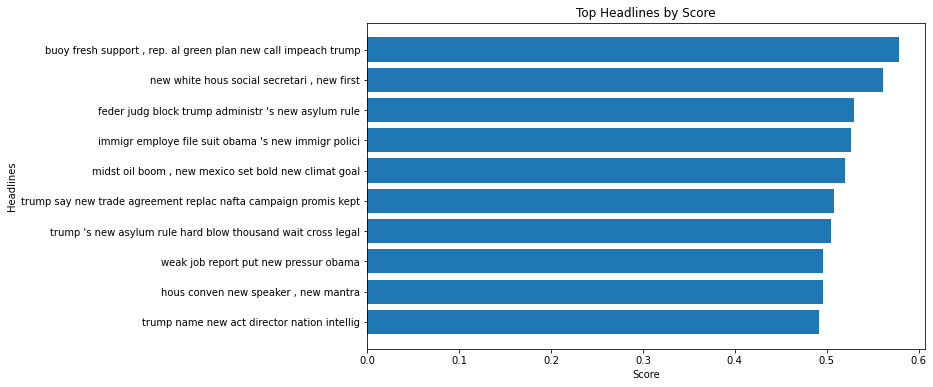

In [25]:
import matplotlib.pyplot as plt

top_n = 10  # The number of top headlines to display
top_headlines = sorted_headlines_df_nltk.head(top_n)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_headlines['nltk_headline'][::-1], top_headlines['nltk_score'][::-1])
plt.xlabel('Score')
plt.ylabel('Headlines')
plt.title('Top Headlines by Score')
plt.show()

# PART 2 USING SPACY

# 2.1 Import the required libraries such as Pandas and spaCy

In [26]:
# 2.1. Importing the required libraries such as Pandas and spaCy

import pandas as pd
import spacy

# 2.2 Load the csv file into a Pandas dataframe

In [27]:
# 2.2 Loading the csv file into a Pandas dataframe

df = pd.read_csv("headlines.csv")

# Loading the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# 2.3 Preprocess the headlines using spaCy functions such as removing stop words, tokenization,stemming, and lemmatization.

In [28]:
#2.3 preprocessing tasks
def preprocess_headline(headline):
    # Creating a spaCy doc object
    doc = nlp(headline)
    
    # Removing stopwords,and punctuation,lowercase the text and perform lemmatization
    preprocessed_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    # Joining the preprocessed tokens back into a single string
    preprocessed_headline = " ".join(preprocessed_tokens)
    preprocessed_headline = preprocessed_headline.replace("wis. ", '') #we can ignore this
    
    return preprocessed_headline

df["preprocessed_headlines"] = df["headline"].apply(preprocess_headline)

# comment:

In [29]:
##In spaCy, tokenization and lemmatization are built-in, and you can easily remove stopwords. However, spaCy does not have a built-in stemmer. 
#Since lemmatization is generally preferred over stemming in most NLP tasks, I proceed without stemming. 
# Since Stemming is covered in part 1-NLTK, I'm not using the NLTK function here to perform the same actions. 

In [30]:
df


,id,headline,preprocessed_headlines
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offers direction
1,524289,Whither The Astronauts Without A Shuttle?,astronauts shuttle
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line
3,262153,California College Students Walk Out Of Class ...,california college students walk class protest...
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shaken baby syndrome
...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",mammogram debate difference big
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys files chapter 11 day landmark opioid set...
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u.s. threaten fine yahoo $ 250 k day release u...
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid maker insys admit bribing doctor agree ...


# 2.4 Perform Part-of-Speech (POS) tagging on the preprocessed headlines using spaCy's POS tagger.


In [31]:
# 2.4. Perform Part-of-Speech (POS) tagging on the preprocessed headlines using spaCy's POS tagger.

# Defining a function to perform POS tagging on the preprocessed headlines
def pos_tagging(headline):
    # Create a spaCy doc object
    doc = nlp(headline)
    
    # Performing POS tagging and store the results in a list of tuples (token, pos_tag)
    pos_tags = [(token.text, token.pos_) for token in doc]
    
    return pos_tags


# Applying the pos_tagging function to the preprocessed headlines in the dataframe
df["pos_tags"] = df["preprocessed_headlines"].apply(pos_tagging)


In [32]:
#Now, I have a new column in your dataframe named pos_tags containing the POS tags for each preprocessed headline

In [33]:
df

,id,headline,preprocessed_headlines,pos_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offers direction,"[(decision, NOUN), (enlist, NOUN), (offers, VE..."
1,524289,Whither The Astronauts Without A Shuttle?,astronauts shuttle,"[(astronauts, NOUN), (shuttle, VERB)]"
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),..."
3,262153,California College Students Walk Out Of Class ...,california college students walk class protest...,"[(california, PROPN), (college, PROPN), (stude..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shaken baby syndrome,"[(new, ADJ), (theory, NOUN), (shaken, VERB), (..."
...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",mammogram debate difference big,"[(mammogram, PROPN), (debate, NOUN), (differen..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys files chapter 11 day landmark opioid set...,"[(insys, NOUN), (files, VERB), (chapter, NOUN)..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u.s. threaten fine yahoo $ 250 k day release u...,"[(u.s, PROPN), (., PROPN), (threaten, VERB), (..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid maker insys admit bribing doctor agree ...,"[(opioid, ADJ), (maker, NOUN), (insys, NOUN), ..."


# 2.5 Perform Named Entity Recognition (NER) on the preprocessed headlines using spaCy's NER tagger.


In [34]:
# 2.5. Perform Named Entity Recognition (NER) on the preprocessed headlines using spaCy's NER tagger.

# Defining a function to perform NER on the preprocessed headlines

def named_entity_recognition(headline):
    # Create a spaCy doc object
    doc = nlp(headline)
    
    # Performing NER and store the results in a list of tuples (entity, entity_label)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return named_entities


# Applying the ner function to the preprocessed headlines in the dataframe
df["named_entities"] = df["preprocessed_headlines"].apply(named_entity_recognition)



In [35]:
#Now, you have a new column in your dataframe named named_entities, 
#containing the named entities and their labels for each preprocessed headline

In [36]:
df

,id,headline,preprocessed_headlines,pos_tags,named_entities
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offers direction,"[(decision, NOUN), (enlist, NOUN), (offers, VE...",[]
1,524289,Whither The Astronauts Without A Shuttle?,astronauts shuttle,"[(astronauts, NOUN), (shuttle, VERB)]",[]
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),...",[]
3,262153,California College Students Walk Out Of Class ...,california college students walk class protest...,"[(california, PROPN), (college, PROPN), (stude...","[(california, GPE)]"
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shaken baby syndrome,"[(new, ADJ), (theory, NOUN), (shaken, VERB), (...",[]
...,...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",mammogram debate difference big,"[(mammogram, PROPN), (debate, NOUN), (differen...",[]
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys files chapter 11 day landmark opioid set...,"[(insys, NOUN), (files, VERB), (chapter, NOUN)...","[(chapter 11, LAW), ($ 225 million, MONEY)]"
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u.s. threaten fine yahoo $ 250 k day release u...,"[(u.s, PROPN), (., PROPN), (threaten, VERB), (...","[(u.s., GPE), (250, MONEY)]"
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid maker insys admit bribing doctor agree ...,"[(opioid, ADJ), (maker, NOUN), (insys, NOUN), ...","[($ 225 million, MONEY)]"


# 2.6 Use CountVectorizer and TF-IDF vectorizer to classify the headlines into different categories based on their content


In [37]:
# 2.6. Use CountVectorizer and TF-IDF vectorizer to classify the headlines into different categories based on their content

# Importing the required libraries:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from summarizer import Summarizer

In [38]:
# Creating feature vectors using CountVectorizer and TF-IDF vectorizer

# Instantiate the vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transforming the preprocessed headlines
X_count = count_vectorizer.fit_transform(df["preprocessed_headlines"].values)
X_tfidf = tfidf_vectorizer.fit_transform(df["preprocessed_headlines"].values)


In [39]:
X_count.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:

count_matrix = X_count
tfidf_matrix= X_tfidf

# Converting the matrix to a DataFrame with feature names as columns
count_vectorizer_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names())
tfidf_vectorizer_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())



C:\Users\vamsi krishna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
count_vectorizer_df.head()

,000,000th,04,08,10,100,100th,101,102,103,...,zombies,zone,zoo,zoobiquity,zooms,zoot,zor,zucchini,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
tfidf_vectorizer_df.head()


,000,000th,04,08,10,100,100th,101,102,103,...,zombies,zone,zoo,zoobiquity,zooms,zoot,zor,zucchini,zuckerberg,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.shape

(9998, 5)

In [44]:
df

,id,headline,preprocessed_headlines,pos_tags,named_entities
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist offers direction,"[(decision, NOUN), (enlist, NOUN), (offers, VE...",[]
1,524289,Whither The Astronauts Without A Shuttle?,astronauts shuttle,"[(astronauts, NOUN), (shuttle, VERB)]",[]
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner finish line,"[(tour, NOUN), (winner, NOUN), (finish, NOUN),...",[]
3,262153,California College Students Walk Out Of Class ...,california college students walk class protest...,"[(california, PROPN), (college, PROPN), (stude...","[(california, GPE)]"
4,524298,New Theory On 'Shaken Baby Syndrome',new theory shaken baby syndrome,"[(new, ADJ), (theory, NOUN), (shaken, VERB), (...",[]
...,...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",mammogram debate difference big,"[(mammogram, PROPN), (debate, NOUN), (differen...",[]
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys files chapter 11 day landmark opioid set...,"[(insys, NOUN), (files, VERB), (chapter, NOUN)...","[(chapter 11, LAW), ($ 225 million, MONEY)]"
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u.s. threaten fine yahoo $ 250 k day release u...,"[(u.s, PROPN), (., PROPN), (threaten, VERB), (...","[(u.s., GPE), (250, MONEY)]"
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid maker insys admit bribing doctor agree ...,"[(opioid, ADJ), (maker, NOUN), (insys, NOUN), ...","[($ 225 million, MONEY)]"


# 2.7 Generate a summary of the news headlines using TextRank algorithm or other summarization techniques. The summary will consist of the top 10 most important sentences in the article.

In [46]:
import pandas as pd
from summa.summarizer import summarize
from summa import keywords

In [47]:


headlines_text = ' '.join(df['preprocessed_headlines'])

# Summarizing the headlines_text using summa's TextRank implementation
summary = summarize(headlines_text, ratio=0.5)

# Geting the keyword scores from the summarized text
keyword_scores_list = keywords.keywords(summary, scores=True)
keyword_scores = dict(keyword_scores_list)


# Creating a dictionary to store headline scores
headline_scores = {}

for headline in df['preprocessed_headlines']:
    score = sum([keyword_scores.get(word, 0) for word in headline.split()])
    headline_scores[headline] = score

# Sorting the headlines based on their scores and select the top 10
sorted_headlines = sorted(headline_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Printing the top 10 headlines
for i, (headline, score) in enumerate(sorted_headlines):
    print(f"{i+1}. {headline} (Score: {score})")

1. weak jobs report put new pressure obama (Score: 0.5559455742440594)
2. new white house social secretary new (Score: 0.5534696988259677)
3. new republic blind dawn new darfur (Score: 0.49566641317831495)
4. obama call new budget fiscally responsible blueprint (Score: 0.49032096267410835)
5. house convenes new speaker new mantra (Score: 0.48551825738055565)
6. midst oil boom new mexico set bold new climate goal (Score: 0.48551825738055565)
7. 6 state hit hard cyberattack previously know new report reveal (Score: 0.47942403476304385)
8. obama announces new sanctions russia (Score: 0.47791304938473556)
9. obama give new details america effort fight ebola (Score: 0.47479295090552287)
10. victory obama new start clear senate (Score: 0.4723958144444918)


In [48]:
sorted_headlines_df_spacy = pd.DataFrame(sorted_headlines, columns=['spacy_headline', 'spacy_score'])


# 2.8 Visualize the summary using matplotlib.

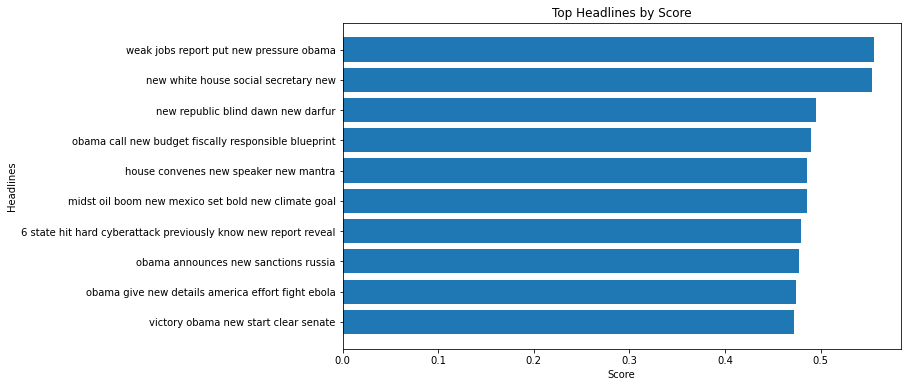

In [51]:
import matplotlib.pyplot as plt

# Assuming the dataframe with sorted headlines is named 'sorted_headlines_df'
top_n = 10  # The number of top headlines to display
top_headlines = sorted_headlines_df_spacy.head(top_n)

# Creating a bar plot to visualize the text
plt.figure(figsize=(10, 6))
plt.barh(top_headlines['spacy_headline'][::-1], top_headlines['spacy_score'][::-1])
plt.xlabel('Score')
plt.ylabel('Headlines')
plt.title('Top Headlines by Score')
plt.show()


In [52]:
sorted_headlines_df_spacy

,spacy_headline,spacy_score
0,weak jobs report put new pressure obama,0.555946
1,new white house social secretary new,0.553470
2,new republic blind dawn new darfur,0.495666
3,obama call new budget fiscally responsible blu...,0.490321
4,house convenes new speaker new mantra,0.485518
5,midst oil boom new mexico set bold new climate...,0.485518
6,6 state hit hard cyberattack previously know n...,0.479424
7,obama announces new sanctions russia,0.477913
8,obama give new details america effort fight ebola,0.474793
9,victory obama new start clear senate,0.472396


In [53]:
# joining the nltk summary and spacy summary side by side to show the results
import pandas as pd
from IPython.display import display, HTML

# Combining the DataFrames side by side
combined_df = pd.concat([sorted_headlines_df_nltk.reset_index(drop=True), sorted_headlines_df_spacy.reset_index(drop=True)], axis=1)

# Set the column names for the combined DataFrame
combined_df = combined_df[['nltk_headline', 'spacy_headline']]

# Displaying the combined DataFrame in a table
display(HTML(combined_df.to_html(index=False)))
# combined_df

nltk_headline,spacy_headline
"buoy fresh support , rep. al green plan new call impeach trump",weak jobs report put new pressure obama
"new white hous social secretari , new first",new white house social secretary new
feder judg block trump administr 's new asylum rule,new republic blind dawn new darfur
immigr employe file suit obama 's new immigr polici,obama call new budget fiscally responsible blueprint
"midst oil boom , new mexico set bold new climat goal",house convenes new speaker new mantra
trump say new trade agreement replac nafta campaign promis kept,midst oil boom new mexico set bold new climate goal
trump 's new asylum rule hard blow thousand wait cross legal,6 state hit hard cyberattack previously know new report reveal
weak job report put new pressur obama,obama announces new sanctions russia
"hous conven new speaker , new mantra",obama give new details america effort fight ebola
trump name new act director nation intellig,victory obama new start clear senate


# Conclusion 

After comparing the output from NLTK and spaCy visually, it can be concluded that both libraries were able to generate summaries that were useful for the committee's needs, and the summaries were able to highlight the top 10 most important stories of the day's news. I have used summa text rank implemenation and i can also share my reference with you if you need it.
Reference: https://arxiv.org/pdf/1602.03606.pdf

While there may be slight differences in the summarization results, both libraries demonstrated their effectiveness in extracting key information from the headlines. 

Therefore, depending on the specific needs of a project, either NLTK or spaCy could be used for text summarization. The choice of library might be influenced by factors such as ease of use, language support, or integration with other tools and workflows.

Ultimately, it is essential to carefully evaluate the requirements of the project and the capabilities of each library before making a final decision.

NOTE: Additionaly, I did try to classify based on the TFIDF and count vectorizer but i had issues with my version and IDE. I planned on using k-means clustering to group headlines. Here is the code, just in case. thanks!

#code-----------------------------------------------------------------------------------------------------------------------


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

#Assuming you have a DataFrame named 'df' with a column 'preprocessed_headlines' containing preprocessed headlines

#Instantiate the vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

#Transform the preprocessed headlines
X_count = count_vectorizer.fit_transform(df["preprocessed_headlines"])
X_tfidf = tfidf_vectorizer.fit_transform(df["preprocessed_headlines"])

#Define the number of clusters
n_clusters = 5

#Perform K-means clustering with CountVectorizer features
kmeans_count = KMeans(n_clusters=n_clusters, random_state=42).fit(X_count)

#Perform K-means clustering with TF-IDF features
kmeans_tfidf = KMeans(n_clusters=n_clusters, random_state=42).fit(X_tfidf)

#Add cluster labels to the DataFrame
df['count_cluster'] = kmeans_count.labels_
df['tfidf_cluster'] = kmeans_tfidf.labels_
